## Statistical Modeling, Part 1: Linear Regression

In this exercise, you'll get a chance to practice building and analyzing linear models using the data from the UN exercise.

In [2]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt

You'll be working with the combined gdp and life expectancy data.

In [3]:
gdp_le = pd.read_csv('../data/gdp_le.csv').dropna()

In [4]:
gdp_le

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2019,2065.036398,Asia,64.833
1,Afghanistan,2018,2033.779002,Asia,64.486
2,Afghanistan,2017,2058.383832,Asia,64.130
3,Afghanistan,2016,2057.062164,Asia,63.763
4,Afghanistan,2015,2068.265904,Asia,63.377
...,...,...,...,...,...
5109,Zimbabwe,1994,3263.934978,Africa,52.044
5110,Zimbabwe,1993,3033.504852,Africa,53.653
5111,Zimbabwe,1992,3054.889178,Africa,55.243
5112,Zimbabwe,1991,3426.598094,Africa,56.749


### Part 1: Analyzing 2019

For this part, we'll look at our dataset just for the year 2019.

In [5]:
gdp_le_2019 = gdp_le[gdp_le['Year'] == 2019].copy()

Fit a linear regression model on the 2019 data with target variable life expenctancy and predictor variable GDP per capita.

In [7]:
lm = smf.ols('Life_Expectancy ~ GDP_Per_Capita', data = gdp_le_2019).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     166.8
Date:                Mon, 02 Oct 2023   Prob (F-statistic):           8.13e-27
Time:                        00:22:12   Log-Likelihood:                -513.64
No. Observations:                 167   AIC:                             1031.
Df Residuals:                     165   BIC:                             1038.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         67.9940      0.566    120.197      0.000      66.877      69.111
GDP_Per_Capita     0.0002   1.79e-05     12.915      0.000       0.000       0.000
==============================================================================
Omnibus:                       20.455   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.319
Skew:                          -0.923   Prob(JB):                     5.24e-06
Kurtosis:                       3.295   Cond. No.                     4.39e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Question:** How can we interpret the meaning of the coefficient for GDP_Per_Capita?

It might make it easier to interpret if we changed the units on GDP_Per_Capita since a one unit change in GDP per capita does not have a very large impact at all on GDP_Per_Capita.

Fit a new model, but this time use thousands of dollars of GDP_Per_Capita as your predictor variable.

**Hint:** Two ways that you can accomplish this are by creating a new column in your DataFrame or by making use of `I()` in your formula.

In [8]:
lm = smf.ols('Life_Expectancy ~ I(GDP_Per_Capita/1000)', data = gdp_le_2019).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     166.8
Date:                Mon, 02 Oct 2023   Prob (F-statistic):           8.13e-27
Time:                        00:28:50   Log-Likelihood:                -513.64
No. Observations:                 167   AIC:                             1031.
Df Residuals:                     165   BIC:                             1038.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   67.9940      0.566    120.197      0.000      66.877      69.111
I(GDP_Per_Capita / 1000)     0.2307      0.018     12.915      0.000       0.195       0.266
==============================================================================
Omnibus:                       20.455   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.319
Skew:                          -0.923   Prob(JB):                     5.24e-06
Kurtosis:                       3.295   Cond. No.                         43.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Questions:** How do we interpret the meaning of the coefficients for the new model?

Now, let's plot the fitted values against the original data.

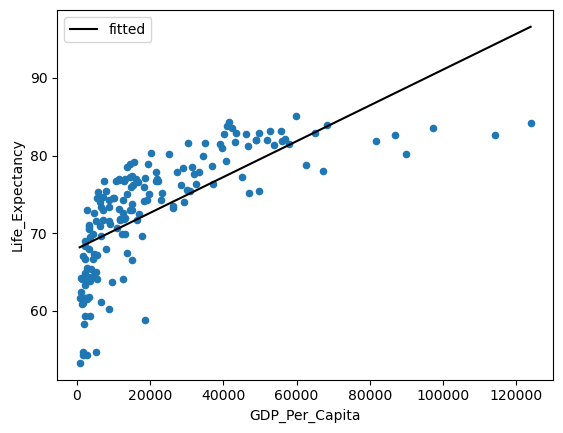

In [9]:
ax = gdp_le_2019.plot(x = 'GDP_Per_Capita', y = 'Life_Expectancy', kind = 'scatter')

fit_df = pd.DataFrame({
    'GDP_Per_Capita': np.linspace(
        start = gdp_le_2019['GDP_Per_Capita'].min(),
        stop = gdp_le_2019['GDP_Per_Capita'].max(), 
        num = 150)})
fit_df['fitted'] = lm.predict(fit_df)

fit_df.plot(x = 'GDP_Per_Capita', y = 'fitted', ax = ax, color = 'black', label = 'fitted');

**Question:** What potential problems do you see with this fit?

You saw from the guided exploration portion of the project that using the logarithm of the GDP resulted in a larger correlation value. 

Fit a new model using the log of GDP Per Capita as a predictor variable.

**Hint:** You can do this by using `'Life_Expectancy ~ np.log(GDP_Per_Capita)'` as your formula.

In [11]:
lm = smf.ols('Life_Expectancy ~ np.log(GDP_Per_Capita)', data = gdp_le_2019).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     424.2
Date:                Mon, 02 Oct 2023   Prob (F-statistic):           1.82e-47
Time:                        00:31:39   Log-Likelihood:                -465.69
No. Observations:                 167   AIC:                             935.4
Df Residuals:                     165   BIC:                             941.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 21.7086      2.512      8.643      0.000      16.749      26.668
np.log(GDP_Per_Capita)     5.4472      0.264     20.596      0.000       4.925       5.969
==============================================================================
Omnibus:                       33.242   Durbin-Watson:                   2.211
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.032
Skew:                          -1.028   Prob(JB):                     3.05e-12
Kurtosis:                       4.843   Cond. No.                         78.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Difficult Question:** How do we interpret the meaning of the coefficient for log(GDP_Per_Capita)?

Let's look at the plot of our fitted vales agains the data.

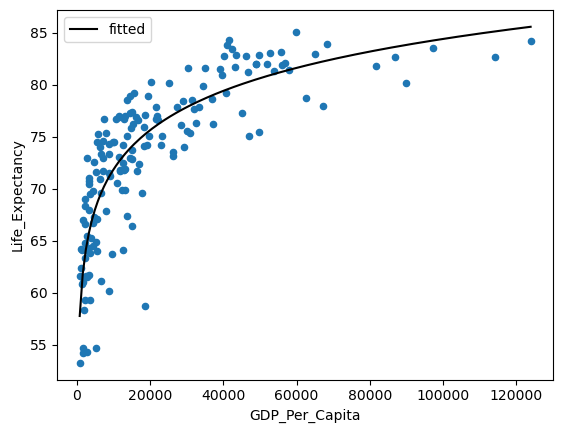

In [12]:
ax = gdp_le_2019.plot(x = 'GDP_Per_Capita', y = 'Life_Expectancy', kind = 'scatter')

fit_df = pd.DataFrame({
    'GDP_Per_Capita': np.linspace(
        start = gdp_le_2019['GDP_Per_Capita'].min(),
        stop = gdp_le_2019['GDP_Per_Capita'].max(), 
        num = 150)})
fit_df['fitted'] = lm.predict(fit_df)

fit_df.plot(x = 'GDP_Per_Capita', y = 'fitted', ax = ax, color = 'black', label = 'fitted');

We can also look on the log scale.

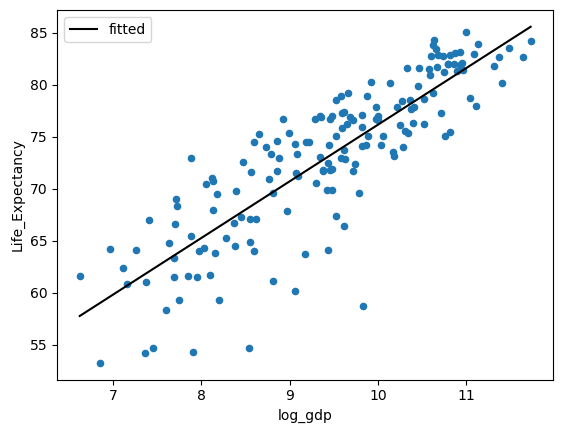

In [13]:
gdp_le_2019['log_gdp'] = np.log(gdp_le_2019['GDP_Per_Capita'])

ax = gdp_le_2019.plot(x = 'log_gdp', y = 'Life_Expectancy', kind = 'scatter')

fit_df = pd.DataFrame({
    'GDP_Per_Capita': np.linspace(
        start = gdp_le_2019['GDP_Per_Capita'].min(),
        stop = gdp_le_2019['GDP_Per_Capita'].max(), 
        num = 150)})
fit_df['log_gdp'] = np.log(fit_df['GDP_Per_Capita'])
fit_df['fitted'] = lm.predict(fit_df)

fit_df.plot(x = 'log_gdp', y = 'fitted', ax = ax, color = 'black', label = 'fitted');

## Part 2: Life Expectancy Over Time

Now, let's explore the relationship between health and wealth over time.

First, using all data in gdp_le, fit a model for life expectancy based on number of years since 1990. (Hint: make use of I()) to help with this.

In [14]:
lm = smf.ols('Life_Expectancy ~ I(Year-1990)', data = gdp_le_2019).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 02 Oct 2023   Prob (F-statistic):                nan
Time:                        00:39:49   Log-Likelihood:                -571.97
No. Observations:                 167   AIC:                             1146.
Df Residuals:                     166   BIC:                             1149.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0868      0.001    126.614      0.000       0.085       0.088
I(Year - 1990)     2.5161      0.020    126.614      0.000       2.477       2.555
==============================================================================
Omnibus:                        9.899   Durbin-Watson:                   1.814
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.526
Skew:                          -0.594   Prob(JB):                      0.00518
Kurtosis:                       2.683   Cond. No.                     6.58e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.25e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Question:** How can you interpret the meaning of both of the coefficients of this model?

We can compare the fit model to the data.

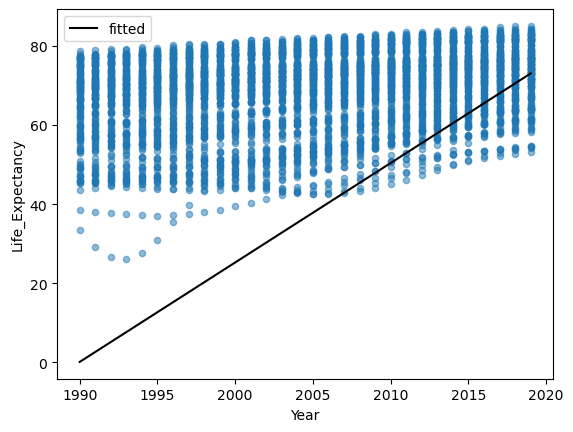

In [15]:
ax = gdp_le.plot(kind = 'scatter', x = 'Year', y = 'Life_Expectancy', alpha = 0.5)

fit_df = pd.DataFrame({
    'Year': np.linspace(
        start = gdp_le['Year'].min(),
        stop = gdp_le['Year'].max(), 
        num = 150)})
fit_df['fitted'] = lm.predict(fit_df)

fit_df.plot(x = 'Year', y = 'fitted', ax = ax, color = 'black', label = 'fitted');

Perhaps we could do better if we include continent in our model. Fit a model which includes a term for Continent. (Don't include any interactions yet).

In [19]:
lm_continent = smf.ols('Life_Expectancy ~ I(Year-1990)+Continent', data = gdp_le_2019).fit()
lm_continent.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     43.46
Date:                Mon, 02 Oct 2023   Prob (F-statistic):           3.34e-28
Time:                        00:44:39   Log-Likelihood:                -500.64
No. Observations:                 167   AIC:                             1013.
Df Residuals:                     161   BIC:                             1032.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.0764      0.001     87.316      0.000       0.075       0.078
Continent[T.Asia]             10.3259      1.088      9.489      0.000       8.177      12.475
Continent[T.Europe]           14.7323      1.053     13.987      0.000      12.652      16.812
Continent[T.North America]    11.5139      1.305      8.821      0.000       8.936      14.092
Continent[T.Oceania]           8.2238      1.804      4.560      0.000       4.662      11.785
Continent[T.South America]    11.0767      1.661      6.668      0.000       7.796      14.357
I(Year - 1990)                 2.2142      0.025     87.316      0.000       2.164       2.264
==============================================================================
Omnibus:                        1.898   Durbin-Watson:                   2.180
Prob(Omnibus):                  0.387   Jarque-Bera (JB):                1.599
Skew:                           0.234   Prob(JB):                        0.450
Kurtosis:                       3.103   Cond. No.                     6.65e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.18e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Questions:**

1. Is including a term for continent statistically significant?
2. How do you interpret the meaning of the model coefficients?
3. What does the model say about European vs. Asian vs. African countries with respect to life expectancy in 1990 and the increase over time of life expectancy?

In [21]:
sm.stats.anova_lm(lm,lm_continent)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,161.0,3927.638077,0.0,NaN,NaN,NaN
1,161.0,3927.638077,-0.0,-0.0,NaN,NaN


Adjust the `continent` variable below to see the fitted vs. actual values by continent. What do you notice?

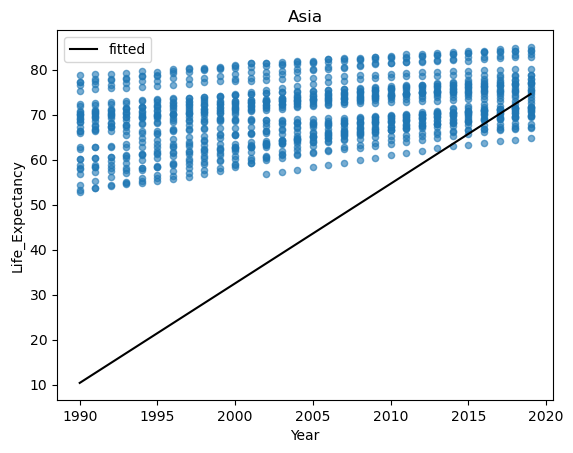

In [20]:
continent = 'Asia'

sub_df = gdp_le[gdp_le['Continent'] == continent]

ax = sub_df.plot(x = 'Year', 
                 y = 'Life_Expectancy',
                 kind = 'scatter',
                 title = continent,
                 alpha = 0.6)

fit_df = pd.DataFrame({
    'Year': np.linspace(start = sub_df['Year'].min(),
                                  stop = sub_df['Year'].max()
                                 ),
    'Continent': continent
})
fit_df['fitted'] = lm_continent.predict(fit_df)
fit_df.plot(x = 'Year', y = 'fitted', ax = ax, color = 'black', label = 'fitted');

Now, add an interaction term between Continent and Year to your model.

In [34]:
lm_continent_int = smf.ols('Life_Expectancy ~ I(Year-1990)+Continent:I(Year-1990)+Continent', data = gdp_le_2019).fit()
lm_continent_int.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     43.46
Date:                Mon, 02 Oct 2023   Prob (F-statistic):           3.34e-28
Time:                        01:02:28   Log-Likelihood:                -500.64
No. Observations:                 167   AIC:                             1013.
Df Residuals:                     161   BIC:                             1032.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                     0.0764      0.001     87.316      0.000       0.075       0.078
Continent[T.Asia]                             0.0123      0.001      9.489      0.000       0.010       0.015
Continent[T.Europe]                           0.0175      0.001     13.987      0.000       0.015       0.020
Continent[T.North America]                    0.0137      0.002      8.821      0.000       0.011       0.017
Continent[T.Oceania]                          0.0098      0.002      4.560      0.000       0.006       0.014
Continent[T.South America]                    0.0132      0.002      6.668      0.000       0.009       0.017
I(Year - 1990)                                2.2142      0.025     87.316      0.000       2.164       2.264
Continent[T.Asia]:I(Year - 1990)              0.3556      0.037      9.489      0.000       0.282       0.430
Continent[T.Europe]:I(Year - 1990)            0.5074      0.036     13.987      0.000       0.436       0.579
Continent[T.North America]:I(Year - 1990)     0.3966      0.045      8.821      0.000       0.308       0.485
Continent[T.Oceania]:I(Year - 1990)           0.2832      0.062      4.560      0.000       0.161       0.406
Continent[T.South America]:I(Year - 1990)     0.3815      0.057      6.668      0.000       0.269       0.494
==============================================================================
Omnibus:                        1.898   Durbin-Watson:                   2.180
Prob(Omnibus):                  0.387   Jarque-Bera (JB):                1.599
Skew:                           0.234   Prob(JB):                        0.450
Kurtosis:                       3.103   Cond. No.                     1.73e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.41e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Questions:** 
1. Are the interaction terms statistically significant?
2. What does the model say about European vs. Asian vs. African countries with respect to life expectancy in 1990 and the increase over time of life expectancy?

In [23]:
sm.stats.anova_lm(lm_continent,lm_continent_int)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,161.0,3927.638077,0.0,NaN,NaN,NaN
1,161.0,3927.638077,-0.0,-4.547474e-13,inf,NaN


You can uses the code in the next cell to explore the output from the new model.

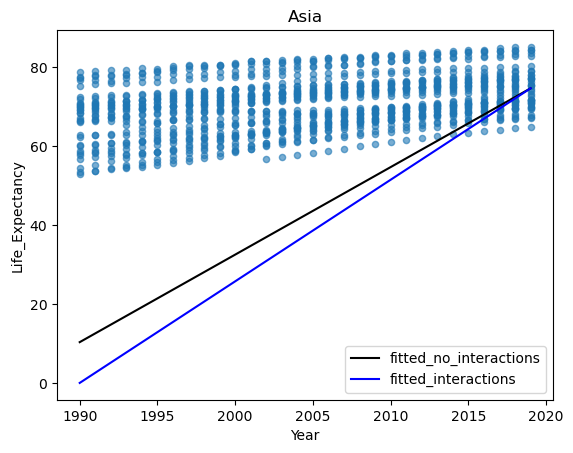

In [24]:
continent = 'Asia'

sub_df = gdp_le[gdp_le['Continent'] == continent]

ax = sub_df.plot(x = 'Year', 
                 y = 'Life_Expectancy',
                 kind = 'scatter',
                 title = continent,
                 alpha = 0.6)

fit_df = pd.DataFrame({
    'Year': np.linspace(start = sub_df['Year'].min(),
                        stop = sub_df['Year'].max()
                       ),
    'Continent': continent
})
fit_df['fitted_no_interactions'] = lm_continent.predict(fit_df)
fit_df['fitted_interactions'] = lm_continent_int.predict(fit_df)
fit_df.plot(x = 'Year', y = 'fitted_no_interactions', ax = ax, color = 'black', label = 'fitted_no_interactions')
fit_df.plot(x = 'Year', y = 'fitted_interactions', ax = ax, color = 'blue', label = 'fitted_interactions');

## Part 3: The Effect of Wealth on Health

Now, let's try and uncover the effect of wealth on health, after accounting for the effect of Continent and year.

Fit a model that builds off of your previous model but includes a term for the log of gdp per capita.

In [35]:
lm_gdp = smf.ols('Life_Expectancy ~ I(Year-1990)+Continent:I(Year-1990)+Continent+np.log(GDP_Per_Capita)', data = gdp_le_2019).fit()
lm_gdp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     100.6
Date:                Mon, 02 Oct 2023   Prob (F-statistic):           1.06e-51
Time:                        01:03:08   Log-Likelihood:                -441.48
No. Observations:                 167   AIC:                             897.0
Df Residuals:                     160   BIC:                             918.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                     0.0363      0.003     11.394      0.000       0.030       0.043
Continent[T.Asia]                             0.0060      0.001      5.834      0.000       0.004       0.008
Continent[T.Europe]                           0.0073      0.001      6.141      0.000       0.005       0.010
Continent[T.North America]                    0.0069      0.001      5.650      0.000       0.004       0.009
Continent[T.Oceania]                          0.0065      0.002      4.275      0.000       0.004       0.010
Continent[T.South America]                    0.0067      0.001      4.548      0.000       0.004       0.010
I(Year - 1990)                                1.0515      0.092     11.394      0.000       0.869       1.234
Continent[T.Asia]:I(Year - 1990)              0.1745      0.030      5.834      0.000       0.115       0.234
Continent[T.Europe]:I(Year - 1990)            0.2113      0.034      6.141      0.000       0.143       0.279
Continent[T.North America]:I(Year - 1990)     0.1988      0.035      5.650      0.000       0.129       0.268
Continent[T.Oceania]:I(Year - 1990)           0.1895      0.044      4.275      0.000       0.102       0.277
Continent[T.South America]:I(Year - 1990)     0.1947      0.043      4.548      0.000       0.110       0.279
np.log(GDP_Per_Capita)                        4.0736      0.317     12.843      0.000       3.447       4.700
==============================================================================
Omnibus:                        6.840   Durbin-Watson:                   2.170
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                7.798
Skew:                          -0.311   Prob(JB):                       0.0203
Kurtosis:                       3.857   Cond. No.                     2.22e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.59e-34. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Question:** How do we interpret the coefficient of log(gdp)?

In [26]:
gdp_le['log_gdp'] = np.log(gdp_le['GDP_Per_Capita'])

The resulting model looks at gdp vs. life expectancy by continent. You can explore how the fitted values compare to the actual values by adjusting the values for year and continent below.

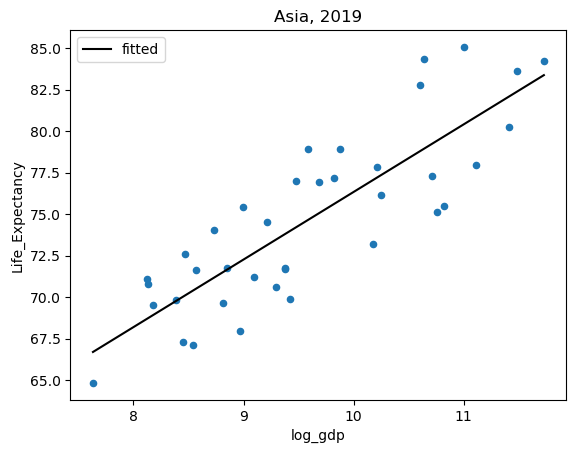

In [27]:
year = 2019
continent = 'Asia'

sub_df = gdp_le[(gdp_le['Year'] == year) & (gdp_le['Continent'] == continent)]

ax = sub_df.plot(x = 'log_gdp', y = 'Life_Expectancy', kind = 'scatter', title = f'{continent}, {year}')

fit_df = pd.DataFrame({
    'Year': year,
    'Continent': continent,
    'GDP_Per_Capita': np.linspace(start = sub_df['GDP_Per_Capita'].min(),
                                  stop = sub_df['GDP_Per_Capita'].max()
                                 )
})
fit_df['fitted'] = lm_gdp.predict(fit_df)
fit_df['log_gdp'] = np.log(fit_df['GDP_Per_Capita'])
fit_df.plot(x = 'log_gdp', y = 'fitted', ax = ax, color = 'black', label = 'fitted');

Perhaps we could estimate different effects of gdp per continent. Add an interaction term between continent and gdp.

In [36]:
lm_gdp_cont = smf.ols('Life_Expectancy ~ I(Year-1990)+Continent:(I(Year-1990)+np.log(GDP_Per_Capita))+Continent+np.log(GDP_Per_Capita)', data = gdp_le_2019).fit()
lm_gdp_cont.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     54.49
Date:                Mon, 02 Oct 2023   Prob (F-statistic):           1.40e-47
Time:                        01:04:13   Log-Likelihood:                -439.83
No. Observations:                 167   AIC:                             903.7
Df Residuals:                     155   BIC:                             941.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             0.0404      0.006      7.172      0.000       0.029       0.052
Continent[T.Asia]                                     0.0019      0.008      0.226      0.821      -0.015       0.018
Continent[T.Europe]                                  -0.0138      0.013     -1.071      0.286      -0.039       0.012
Continent[T.North America]                            0.0069      0.012      0.565      0.573      -0.017       0.031
Continent[T.Oceania]                                  0.0021      0.013      0.162      0.872      -0.023       0.027
Continent[T.South America]                           -0.0178      0.040     -0.441      0.660      -0.098       0.062
I(Year - 1990)                                        1.1718      0.163      7.172      0.000       0.849       1.495
Continent[T.Asia]:I(Year - 1990)                      0.0546      0.241      0.226      0.821      -0.422       0.531
Continent[T.Europe]:I(Year - 1990)                   -0.4014      0.375     -1.071      0.286      -1.142       0.339
Continent[T.North America]:I(Year - 1990)             0.1990      0.352      0.565      0.573      -0.496       0.894
Continent[T.Oceania]:I(Year - 1990)                   0.0601      0.372      0.162      0.872      -0.675       0.795
Continent[T.South America]:I(Year - 1990)            -0.5165      1.172     -0.441      0.660      -2.831       1.798
np.log(GDP_Per_Capita)                                3.6519      0.569      6.419      0.000       2.528       4.776
Continent[T.Asia]:np.log(GDP_Per_Capita)              0.4205      0.781      0.539      0.591      -1.122       1.963
Continent[T.Europe]:np.log(GDP_Per_Capita)            1.7965      1.099      1.634      0.104      -0.375       3.968
Continent[T.North America]:np.log(GDP_Per_Capita)     0.0607      1.090      0.056      0.956      -2.093       2.214
Continent[T.Oceania]:np.log(GDP_Per_Capita)           0.4510      1.217      0.371      0.711      -1.953       2.855
Continent[T.South America]:np.log(GDP_Per_Capita)     2.2053      3.546      0.622      0.535      -4.800       9.211
==============================================================================
Omnibus:                        6.520   Durbin-Watson:                   2.179
Prob(Omnibus):                  0.038   Jarque-Bera (JB):                8.055
Skew:                          -0.256   Prob(JB):                       0.0178
Kurtosis:                       3.946   Cond. No.                     4.51e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 

**Questions:** 
1. Are the new interaction terms statistically significant?
2. What does the model say about European vs. Asian vs. African countries with respect to the effect of gdp on life expectancy?

In [29]:
sm.stats.anova_lm(lm_gdp,lm_gdp_cont)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,160.0,1934.017184,0.0,NaN,NaN,NaN
1,155.0,1896.142894,5.0,37.874289,0.619206,0.685339


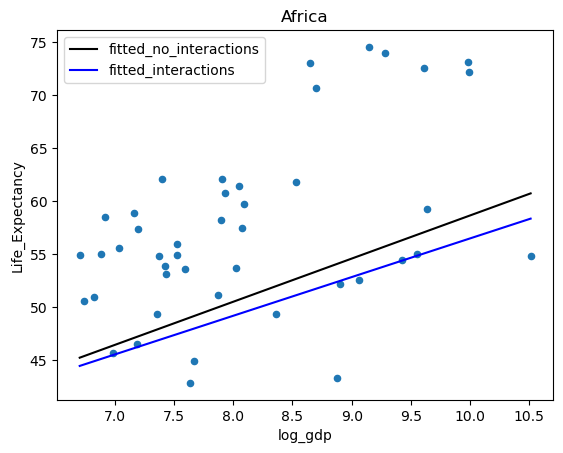

In [30]:
year = 2007
continent = 'Africa'

sub_df = gdp_le[(gdp_le['Year'] == year) & (gdp_le['Continent'] == continent)]

ax = sub_df.plot(x = 'log_gdp', y = 'Life_Expectancy', kind = 'scatter', title = continent)

fit_df = pd.DataFrame({
    'Year': year,
    'Continent': continent,
    'GDP_Per_Capita': np.linspace(start = sub_df['GDP_Per_Capita'].min(),
                                  stop = sub_df['GDP_Per_Capita'].max()
                                 )
})
fit_df['fitted_no_interactions'] = lm_gdp.predict(fit_df)
fit_df['fitted_interactions'] = lm_gdp_cont.predict(fit_df)
fit_df['log_gdp'] = np.log(fit_df['GDP_Per_Capita'])
fit_df.plot(x = 'log_gdp', y = 'fitted_no_interactions', ax = ax, color = 'black', label = 'fitted_no_interactions');
fit_df.plot(x = 'log_gdp', y = 'fitted_interactions', ax = ax, color = 'blue', label = 'fitted_interactions');

Finally, add an interaction term between log(gdp) and year.

In [31]:
lm_gdp_cont_year = smf.ols('Life_Expectancy ~ I(Year - 1990) + Continent + Continent:(I(Year - 1990) + np.log(GDP_Per_Capita)) + np.log(GDP_Per_Capita) + np.log(GDP_Per_Capita):I(Year - 1990)', data = gdp_le).fit()
lm_gdp_cont_year.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     1157.
Date:                Mon, 02 Oct 2023   Prob (F-statistic):               0.00
Time:                        01:00:26   Log-Likelihood:                -14087.
No. Observations:                4922   AIC:                         2.821e+04
Df Residuals:                    4903   BIC:                         2.834e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             8.6679      1.359      6.376      0.000       6.003      11.333
Continent[T.Asia]                                    16.7747      1.374     12.210      0.000      14.081      19.468
Continent[T.Europe]                                  15.5436      1.924      8.077      0.000      11.771      19.316
Continent[T.North America]                           16.6162      2.166      7.673      0.000      12.371      20.862
Continent[T.Oceania]                                 10.6750      2.395      4.457      0.000       5.979      15.371
Continent[T.South America]                           -9.7850      6.029     -1.623      0.105     -21.605       2.035
I(Year - 1990)                                        0.6366      0.064      9.994      0.000       0.512       0.761
Continent[T.Asia]:I(Year - 1990)                     -0.0945      0.023     -4.184      0.000      -0.139      -0.050
Continent[T.Europe]:I(Year - 1990)                   -0.1178      0.026     -4.510      0.000      -0.169      -0.067
Continent[T.North America]:I(Year - 1990)            -0.1326      0.027     -4.995      0.000      -0.185      -0.081
Continent[T.Oceania]:I(Year - 1990)                  -0.1261      0.033     -3.765      0.000      -0.192      -0.060
Continent[T.South America]:I(Year - 1990)            -0.1454      0.035     -4.131      0.000      -0.214      -0.076
np.log(GDP_Per_Capita)                                5.4930      0.172     32.000      0.000       5.156       5.830
Continent[T.Asia]:np.log(GDP_Per_Capita)             -0.8423      0.163     -5.160      0.000      -1.162      -0.522
Continent[T.Europe]:np.log(GDP_Per_Capita)           -0.5182      0.209     -2.476      0.013      -0.928      -0.108
Continent[T.North America]:np.log(GDP_Per_Capita)    -0.6368      0.240     -2.654      0.008      -1.107      -0.166
Continent[T.Oceania]:np.log(GDP_Per_Capita)          -0.0174      0.276     -0.063      0.950      -0.559       0.524
Continent[T.South America]:np.log(GDP_Per_Capita)     2.1486      0.670      3.209      0.001       0.836       3.461
np.log(GDP_Per_Capita):I(Year - 1990)                -0.0401      0.008     -5.165      0.000      -0.055      -0.025
==============================================================================
Omnibus:                      316.970   Durbin-Watson:                   0.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              834.296
Skew:                          -0.362   Prob(JB):                    6.84e-182
Kurtosis:                       4.883   Cond. No.                     1.62e+04
==============================================================================

Notes:
[1] S

**Question:** How do we interpret the new interaction term?

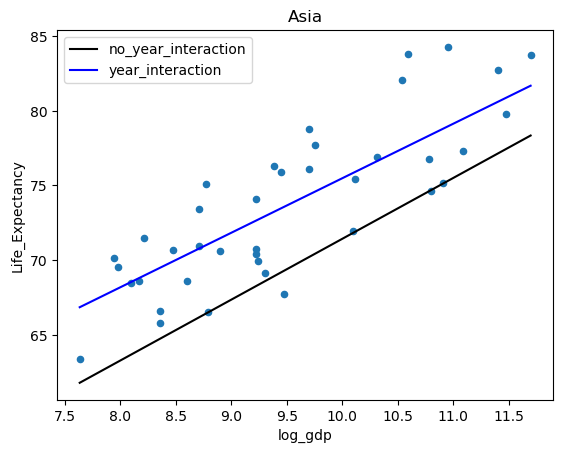

In [32]:
year = 2015
continent = 'Asia'

sub_df = gdp_le[(gdp_le['Year'] == year) & (gdp_le['Continent'] == continent)]

ax = sub_df.plot(x = 'log_gdp', y = 'Life_Expectancy', kind = 'scatter', title = continent)

fit_df = pd.DataFrame({
    'Year': year,
    'Continent': continent,
    'GDP_Per_Capita': np.linspace(start = sub_df['GDP_Per_Capita'].min(),
                                  stop = sub_df['GDP_Per_Capita'].max()
                                 )
})
fit_df['year_interaction'] = lm_gdp_cont_year.predict(fit_df)
fit_df['no_year_interaction'] = lm_gdp_cont.predict(fit_df)
fit_df['log_gdp'] = np.log(fit_df['GDP_Per_Capita'])
fit_df.plot(x = 'log_gdp', y = 'no_year_interaction', ax = ax, color = 'black', label = 'no_year_interaction');
fit_df.plot(x = 'log_gdp', y = 'year_interaction', ax = ax, color = 'blue', label = 'year_interaction');